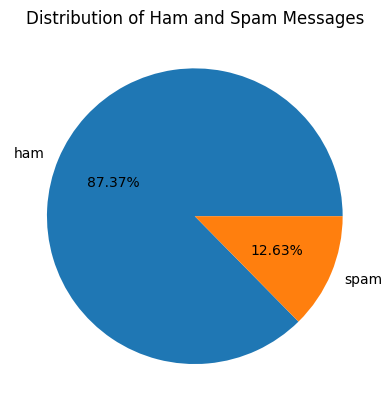

[nltk_data] Downloading package punkt to
[nltk_data]     /home/vaishnavimiryala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


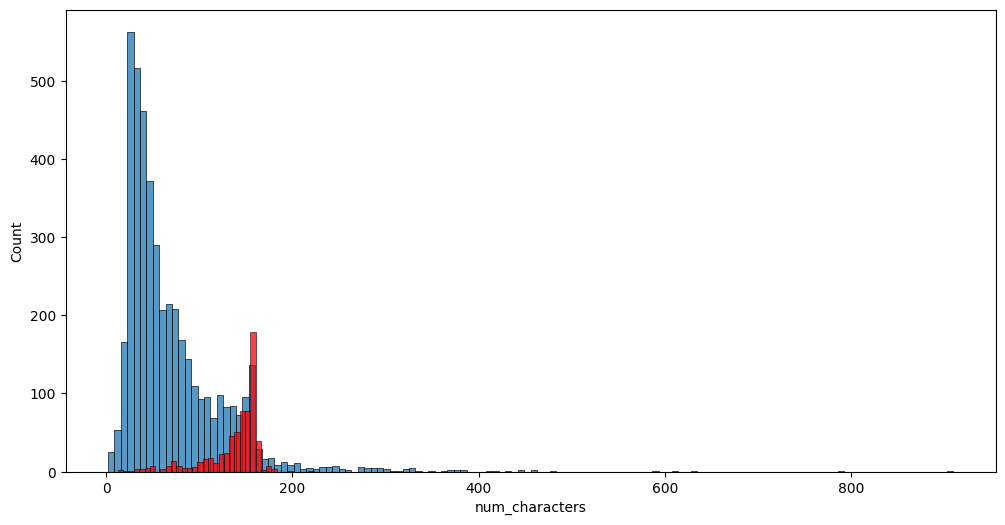

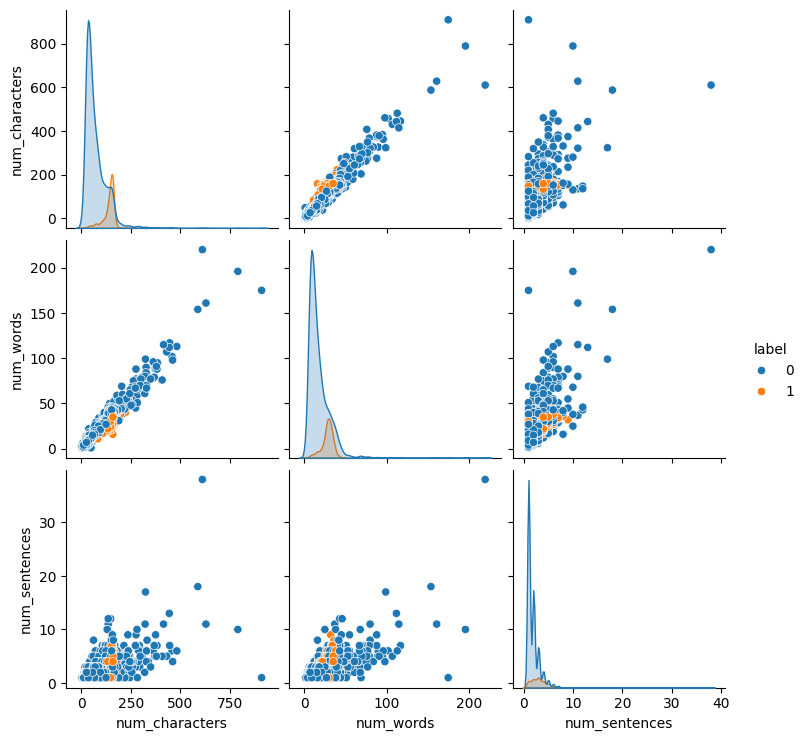

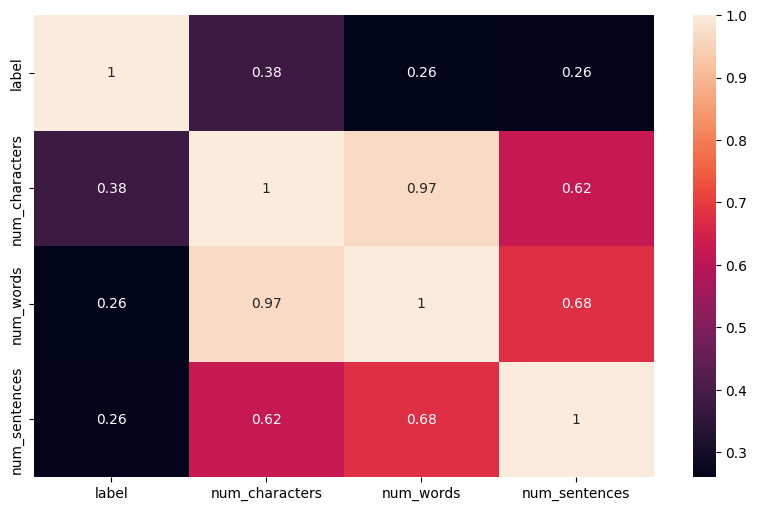

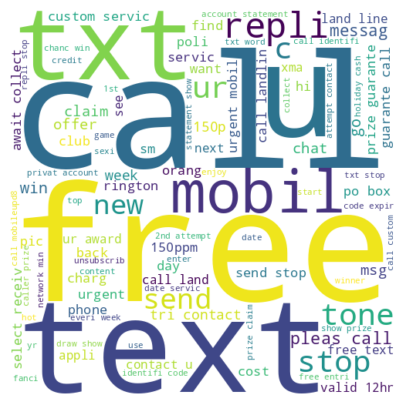

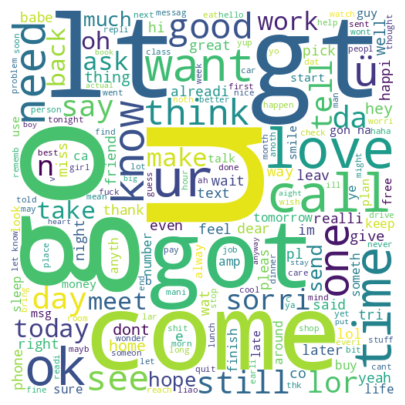

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 120), ('ur', 119), ('mobil', 114), ('stop', 108), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 61), ('urgent', 58), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]


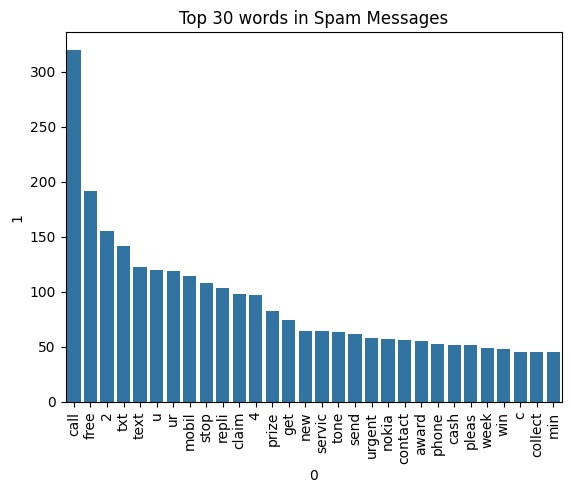

[('u', 897), ('go', 407), ('get', 351), ('2', 288), ('gt', 288), ('lt', 287), ('come', 278), ('got', 239), ('know', 237), ('like', 236), ('call', 235), ('love', 222), ('time', 220), ('ok', 218), ('good', 215), ('want', 209), ('ur', 203), ('day', 195), ('ü', 173), ('need', 171), ('one', 166), ('4', 162), ('lor', 159), ('home', 152), ('think', 150), ('see', 148), ('take', 144), ('still', 144), ('da', 142), ('tell', 133)]


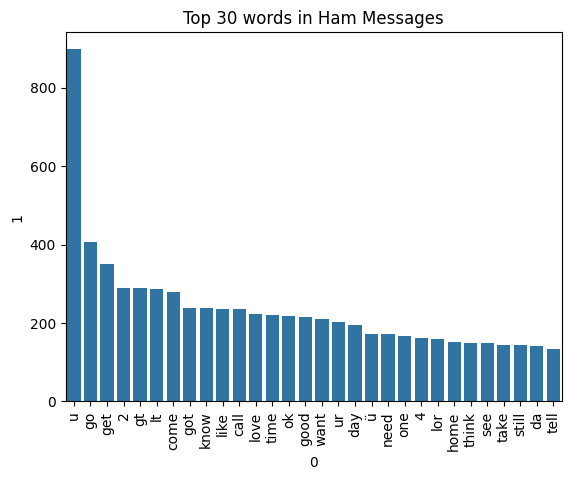

0.8684719535783365
[[793 115]
 [ 21 105]]
0.4772727272727273
0.9680851063829787
[[908   0]
 [ 33  93]]
1.0
0.9758220502901354
[[906   2]
 [ 23 103]]
0.9809523809523809


In [ ]:
import numpy as np
import pandas as pd 

df = pd.read_csv('spam.csv')
df.sample(5)
# df.info()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head


#check if there exists missing vals
df.isnull().sum()

#chek for dup values
df.duplicated().sum()

#we need to remove dups
df = df.drop_duplicates(keep='first')

#EDA - EXPLORATORY DATA ANALYSIS - to help our understanding of the data

#1 Distribution of Ham and Spam Messages
#2 Word Cloud of Ham and Spam Messages

df['label'].value_counts()

import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

#3 
import nltk
# fetch no of chars in each msg
nltk.download('punkt')
# nltk.download('punkt_tab')
df['num_characters'] = df['message'].apply(len)
df.head()

# num of words
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

# num of sentences
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

df[['num_characters', 'num_words', 'num_sentences']].describe()

# for ham
ham = df[df['label'] == 0]
ham[['num_characters', 'num_words', 'num_sentences']].describe()

# for spam
spam = df[df['label'] == 1]
spam[['num_characters', 'num_words', 'num_sentences']].describe()

# histogram plot
# from this we can see that spam messages are longer than ham messages
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(ham['num_characters'])
sns.histplot(spam['num_characters'],color='red') 

# how these cols are related to each other
sns.pairplot(df, hue='label') # we can see some outliers in the data

# correlations
plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True)
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)
# we can see that there is a positive correlation between num_characters, num_words and num_sentences

# DATA PREPROCESSING to prepare the data for model training
# - lowercase
# - Tokenization
# - Removing special characters
# - Removing stop words and punctuation - words which are used in sentence formation but doesnt contribute to the actual meaning of the sentence eg: is , of
# - Stemming - reducing words to their root form eg: running -> run, better -> good
# - Lemmatization - similar to stemming but it uses a dictionary to find the root form
# - Removing extra spaces

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

def transform_text(text):
    text = text.lower() # lowercase

    text = nltk.word_tokenize(text) # Tokenization
    y = [] # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    # removing stop words and punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# result = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
# print(result)

# df['message'][10]

df['transformed_message'] = df['message'].apply(transform_text)
df.head()

# WORD CLOUD
# FOR SPAM MSGS
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_message'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#FOR HAM MSGS

ham_wc = wc.generate(df[df['label'] == 0]['transformed_message'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# DISPLAY TOP 30 WORDS IN SPAM AND HAM MESSAGES
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

from collections import Counter
spam_freq = Counter(spam_corpus)
top_spam_words = spam_freq.most_common(30)
print(top_spam_words)
sns.barplot(x=pd.DataFrame(top_spam_words)[0], y=pd.DataFrame(top_spam_words)[1])    
plt.xticks(rotation='vertical')
plt.title('Top 30 words in Spam Messages')
plt.show()
    
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

ham_freq = Counter(ham_corpus)
top_ham_words = ham_freq.most_common(30)
print(top_ham_words)
sns.barplot(x=pd.DataFrame(top_ham_words)[0], y=pd.DataFrame(top_ham_words)[1])    
plt.xticks(rotation='vertical')
plt.title('Top 30 words in Ham Messages')
plt.show()


# MODEL BUILDING

# 1 using naive bayes classifier

# we have to convert text(msg) to numerical data

# vectorise data using bag of words
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

X = tfidf.fit_transform(df['transformed_message']).toarray()
# X.shape
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

Y = df['label'].values
# Y
Y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

mnb.fit(X_train, Y_train) # BEST PERFORMING MODEL IN TFIDF , PRECISION SCORE IMPROVED SO WE CHOOSE IT
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))


bnb.fit(X_train, Y_train) # BEST PERFORMING MODEL IN CV
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))


# We can also use other models like SVM, Random Forest, etc. but for simplicity we are using Naive Bayes

# model improvement
# 1 change max_features in tfidf vectorizer to 3000 after experimenting with different values which improved accuracy of naive bayes model with precision of 1.0
# 2 scaling lets see if scaling helps - no it didnt help in this case it improved accuracy a bit but disimproved precision score a lot, so we remove it

import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb')) # save vectorizer
pickle.dump(mnb, open('model.pkl', 'wb')) # save model

# # To use the model and vectorizer later, we can load them like this:
# loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
# loaded_model = pickle.load(open('model.pkl', 'rb'))







# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopwords.words('english')

# import string
# string.punctuation

# from nltk.stem.porter import PorterStemmer
# stemmer = PorterStemmer()   
# stemmer.stem('running') # run